### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score

In [3]:
df = pd.read_csv("C:/Users/ARZOO/OneDrive/Desktop/heart.csv")

### Overview of dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#No null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Correlation between target and other features
df.corr()["target"].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

### Data visualization

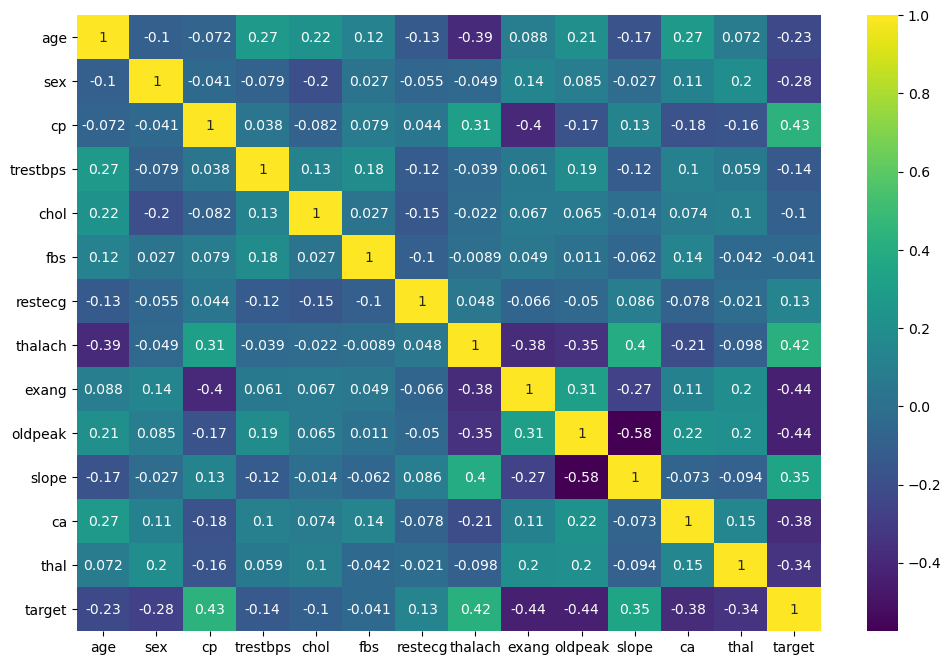

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

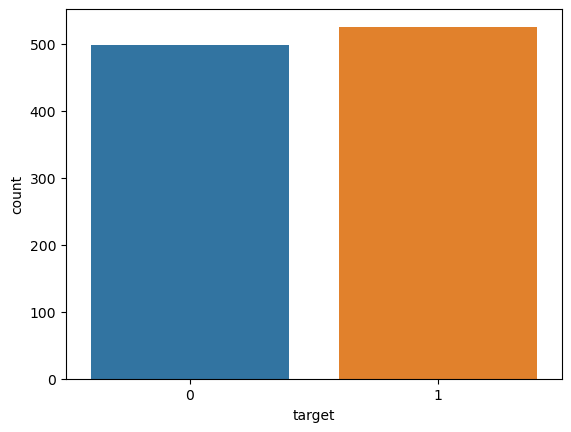

In [9]:
#Value counts of each target
sns.countplot(data=df,x="target")
plt.show()

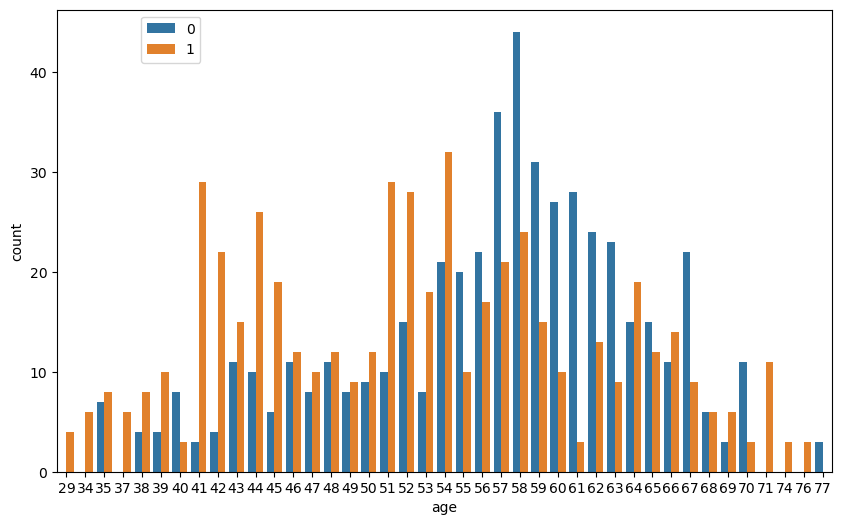

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="age",hue="target")
plt.legend(bbox_to_anchor=(0.10,1))
plt.show()

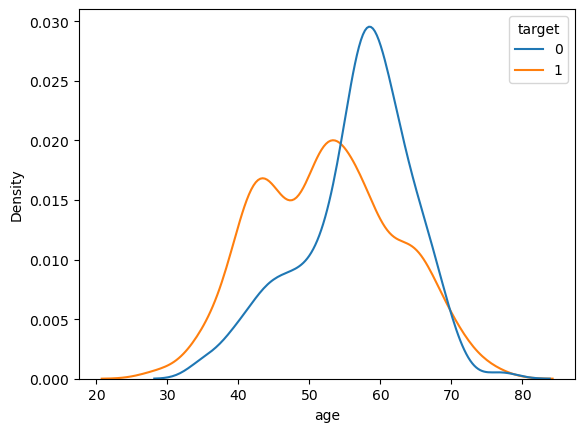

In [11]:
sns.kdeplot(data=df,x="age",hue="target")
plt.show()

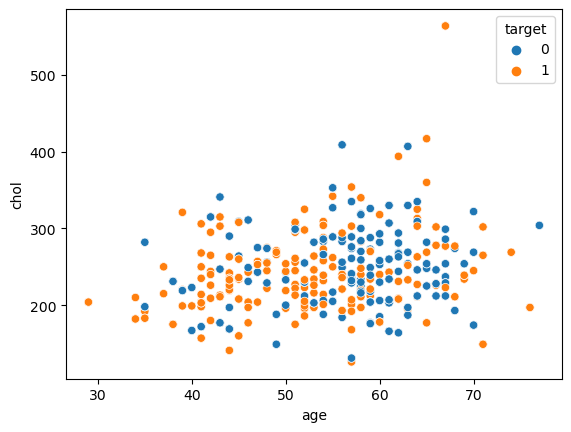

In [12]:
sns.scatterplot(data=df,x="age",y="chol",hue="target")
plt.show()

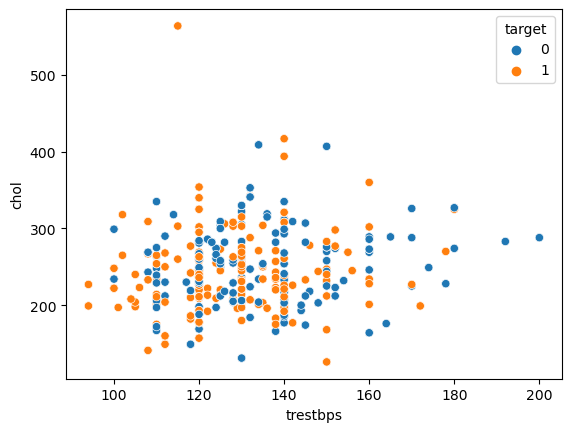

In [13]:
sns.scatterplot(data=df,x="trestbps",y="chol",hue="target")
plt.show()

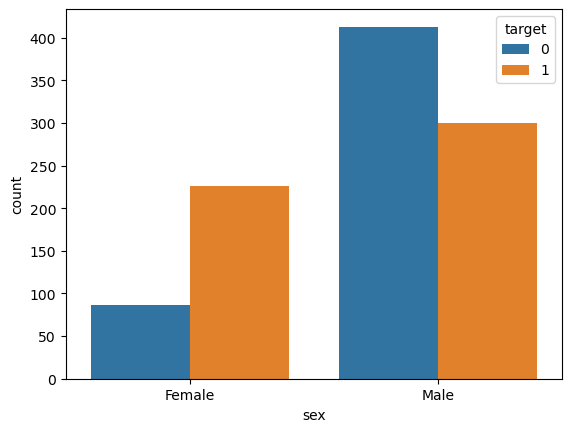

In [14]:
g = sns.countplot(data=df,x="sex",hue="target")
g.set_xticklabels(["Female","Male"])
plt.show()

### Separating features and labels and performing train-test split

In [15]:
X = df.drop("target",axis=1)
y = df["target"]

In [16]:
#Overview of features
X[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2


In [17]:
#Overview of labels 
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [18]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
scaler = StandardScaler()

In [20]:
#Scaling the data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### K Nearest Neighbors

In [21]:
knn = KNeighborsClassifier()

In [22]:
#Generating K values
k_values = np.arange(1,51)
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [23]:
param_grid = {"n_neighbors":k_values}

In [24]:
#Running grid search to compute the best value for n_neighbors 
grid_model = GridSearchCV(knn,param_grid=param_grid,cv=5,scoring="accuracy")

In [25]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [26]:
#Result of grid search
grid_model.best_params_

{'n_neighbors': 1}

In [27]:
y_pred_train = grid_model.predict(scaled_X_train)
y_pred_test = grid_model.predict(scaled_X_test)

In [28]:
confusion_matrix(y_test,y_pred_test)

array([[58,  0],
       [ 3, 42]], dtype=int64)

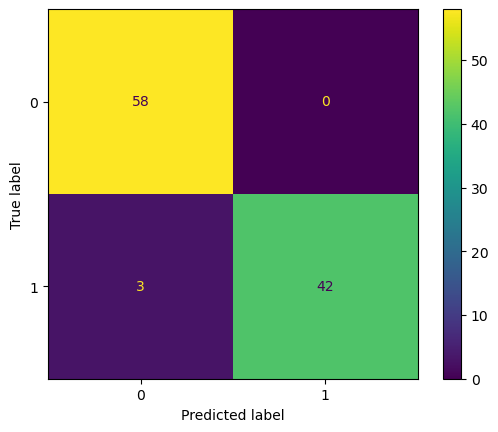

In [29]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [30]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [31]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_pred_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_pred_test))

Accuracy score for training data:  1.0
Accuracy score for testing data:  0.970873786407767


This is not a suitable classification model for this dataset because it has too many features. KNN performs best with low number of features. Hence, we will not take KNN into account.

### Logistic regression 

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [34]:
y_log_train = log_model.predict(scaled_X_train)
y_log_test = log_model.predict(scaled_X_test)

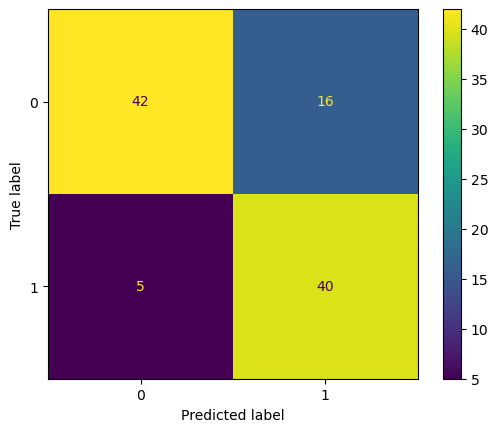

In [35]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [36]:
print(classification_report(y_test,y_log_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80        58
           1       0.71      0.89      0.79        45

    accuracy                           0.80       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.82      0.80      0.80       103



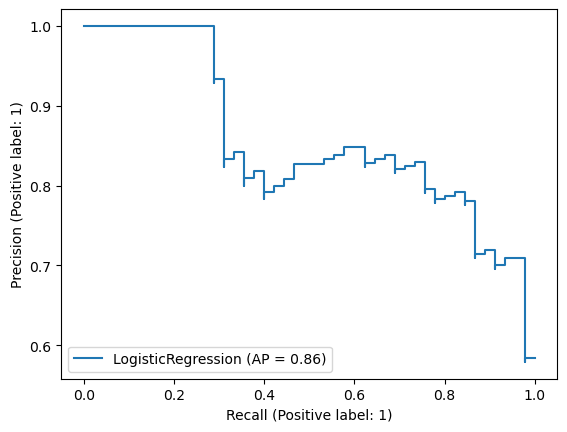

In [37]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

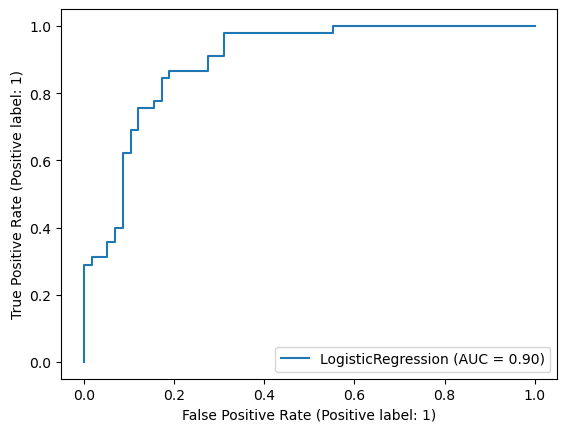

In [38]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [39]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_log_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_log_test))

Accuracy score for training data:  0.8503253796095445
Accuracy score for testing data:  0.7961165048543689


### Decision Trees

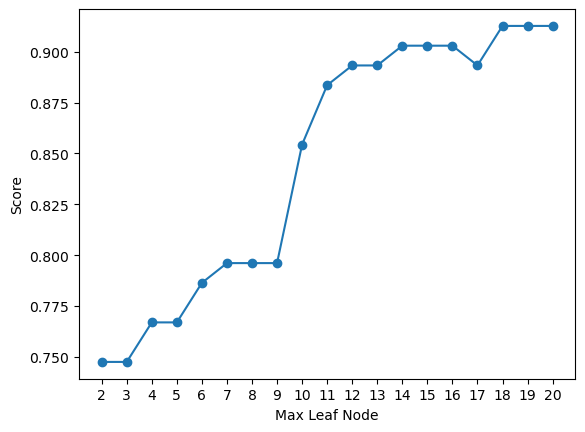

In [40]:
#Determining ideal value for max_leaf_nodes
scoreList = []
for i in range(2,21):
    dt = DecisionTreeClassifier(max_leaf_nodes = i) 
    dt.fit(X_train, y_train)
    scoreList.append(dt.score(X_test, y_test))
    
plt.plot(range(2,21), scoreList,marker="o")
plt.xticks(np.arange(2,21,1))
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.show()

The value chosen for max_leaf_nodes=12 as it has good accuracy and optimal model complexity. 
With increasing value of max_leaf_nodes, model complexity increases which is not ideal.

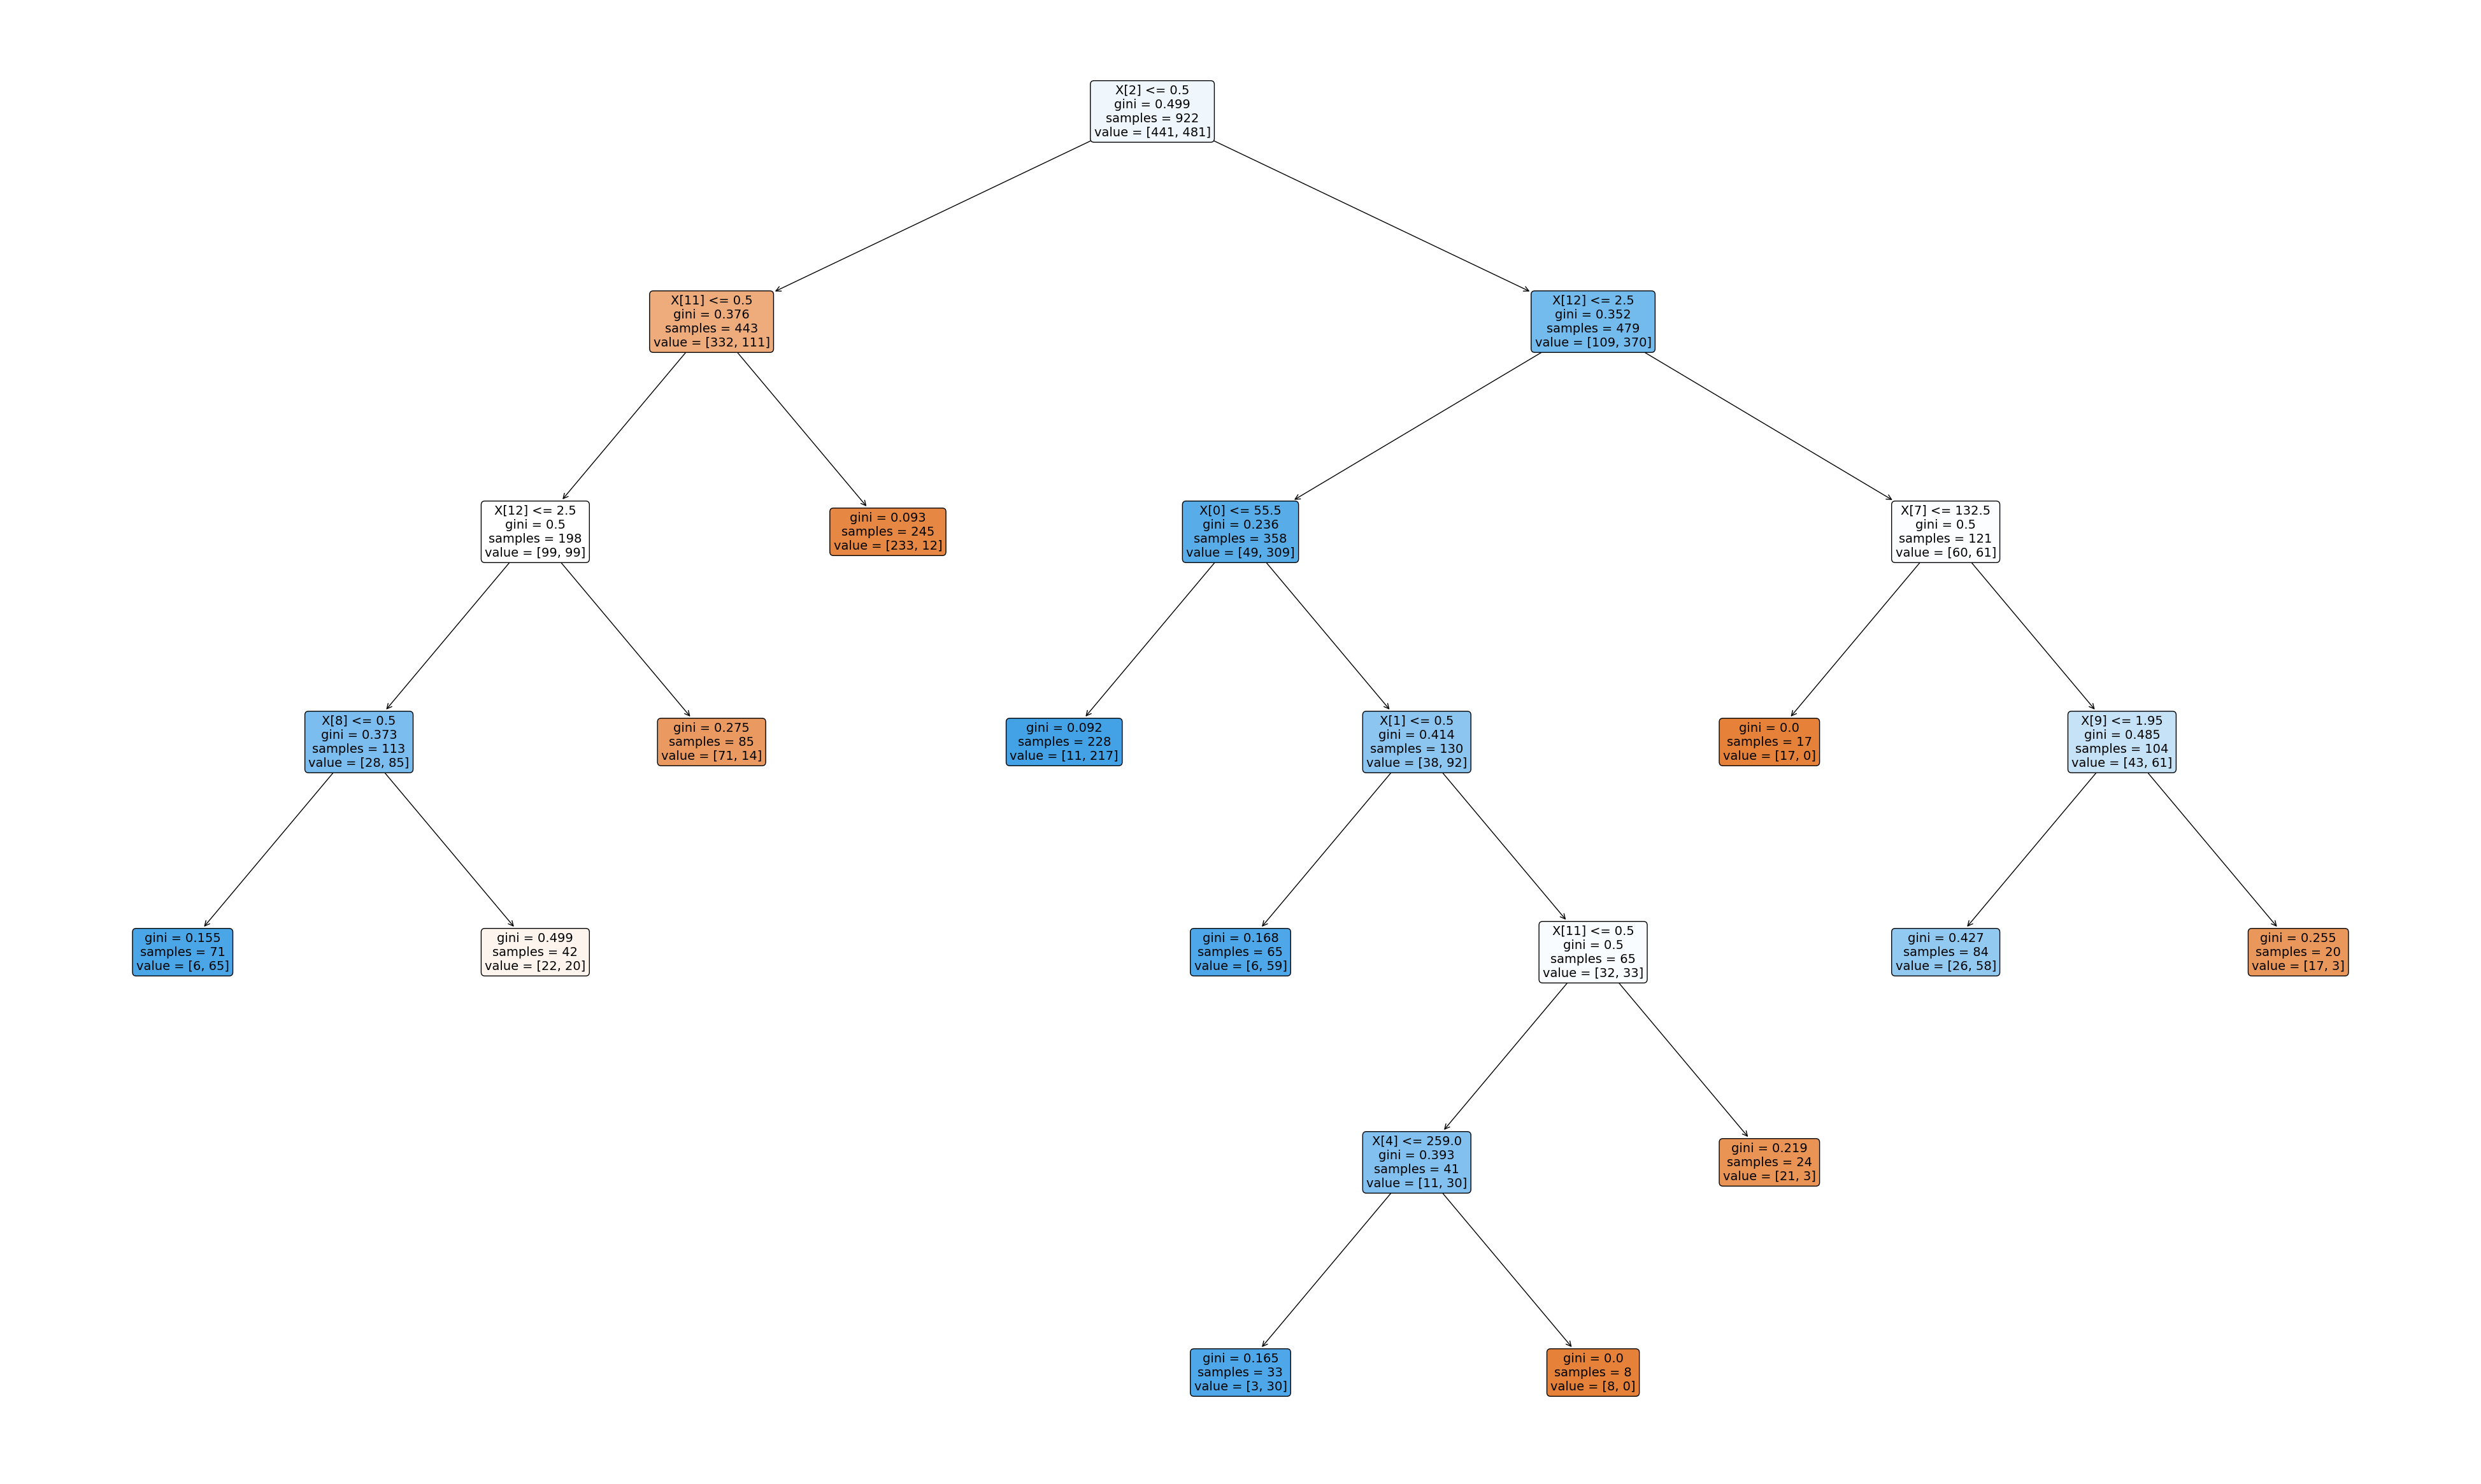

In [41]:
DT = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
DT = DT.fit(X_train,y_train)
plt.figure(figsize=(50,30))
a = plot_tree(DT,filled=True, rounded=True, fontsize=14)

In [42]:
y_dt_train = DT.predict(X_train)
y_dt_test = DT.predict(X_test)

In [43]:
print(classification_report(y_test,y_dt_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.87      0.89      0.88        45

    accuracy                           0.89       103
   macro avg       0.89      0.89      0.89       103
weighted avg       0.89      0.89      0.89       103



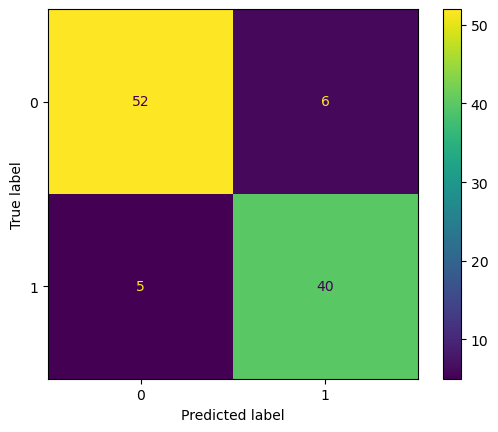

In [44]:
plot_confusion_matrix(DT,X_test,y_test)

In [45]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_dt_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_dt_test))

Accuracy score for training data:  0.8872017353579176
Accuracy score for testing data:  0.8932038834951457


### SVM

In [46]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training data: {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for testing data: {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training data: 0.7266811279826464
Accuracy for testing data: 0.6796116504854369


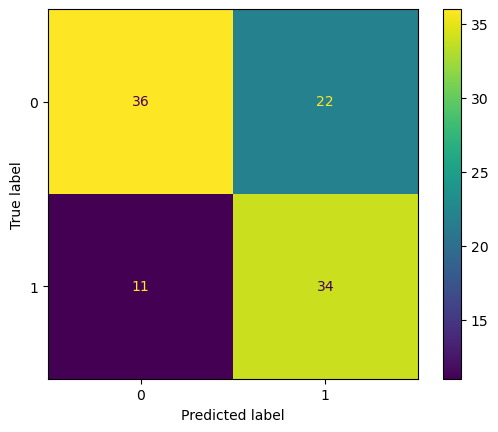

In [47]:
plot_confusion_matrix(classifier,X_test,y_test)

### Naive  Bayes

In [48]:
bayes_model = GaussianNB()

In [49]:
bayes_model.fit(X_train,y_train)

GaussianNB()

In [50]:
y_bayes_train = bayes_model.predict(scaled_X_train)
y_bayes_test = bayes_model.predict(scaled_X_test)

In [51]:
print(classification_report(y_test,y_bayes_test))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        58
           1       1.00      0.02      0.04        45

    accuracy                           0.57       103
   macro avg       0.78      0.51      0.38       103
weighted avg       0.76      0.57      0.43       103



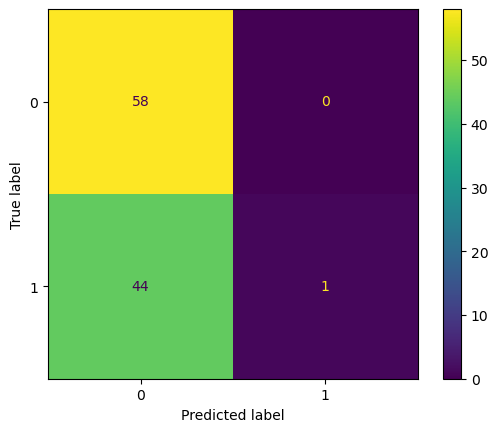

In [52]:
plot_confusion_matrix(bayes_model,scaled_X_test,y_test)

In [53]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_bayes_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_bayes_test))

Accuracy score for training data:  0.4793926247288503
Accuracy score for testing data:  0.5728155339805825


After analysing the accuracy scores for all the models, we can deduce that Decision Trees is the best classifier for this dataset.